In [12]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [13]:
originalImage = cv2.imread("../photos/Characters Test Pattern 688x688.tif", cv2.IMREAD_GRAYSCALE)
#originalImage = cv2.resize(originalImage, (512, 512))

In [14]:
# Generate Gaussian noise
noise = np.random.normal(7, 10, originalImage.shape).astype(np.uint8)
noisyImage = cv2.add(originalImage, noise)

In [15]:
# Perform fft on the noisy image
fftImage = np.fft.fftshift(np.fft.fft2(noisyImage))
magnitudeSpectrum = np.log(np.abs(fftImage) + 1)

In [16]:
def plotImage(row, col, index, image, title):
    plt.subplot(row, col, index)
    # Display the magnitude or real part of the complex image
    if np.iscomplexobj(image):
        plt.imshow(np.abs(image), cmap='gray')  # Display magnitude
    else:
        plt.imshow(image, cmap='gray')  # Display real part
    plt.title(title)

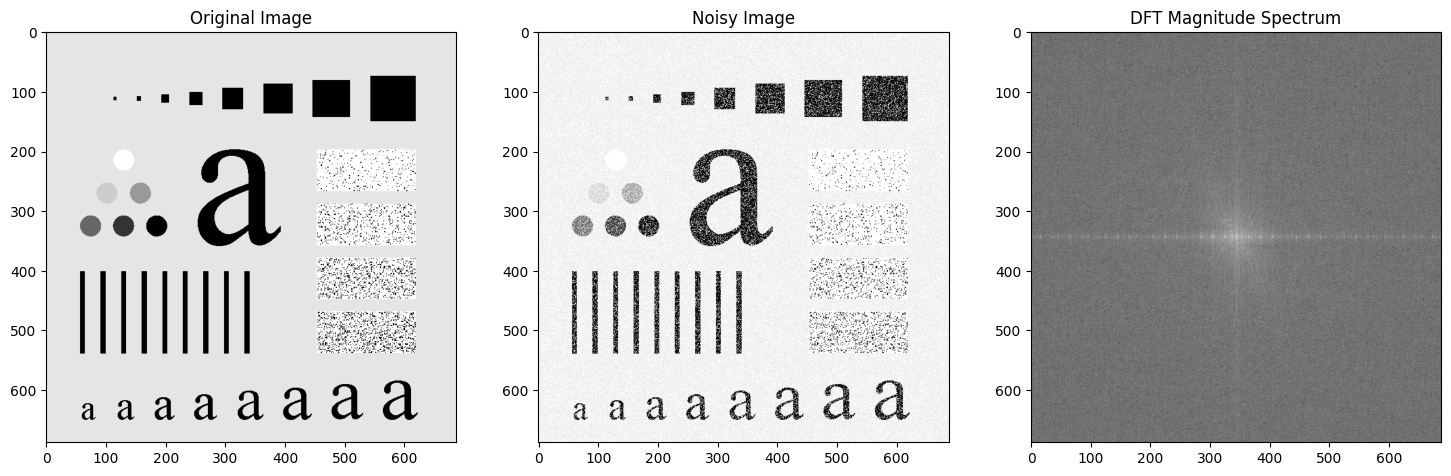

In [17]:
plt.figure(figsize=(18, 6))

plotImage(1, 3, 1, originalImage, "Original Image")
plotImage(1, 3, 2, noisyImage, "Noisy Image")
plotImage(1, 3, 3, magnitudeSpectrum, "DFT Magnitude Spectrum")

In [18]:
def applyIdealLowPassFilter(image, cutOffFrequency):
    height, width = image.shape
    idealFilter = np.zeros(image.shape, dtype=np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height/2)**2 + (v - width/2)**2)
            if (D <= cutOffFrequency):
                idealFilter[u, v] = 1

    filteredImage = image * idealFilter
    return filteredImage

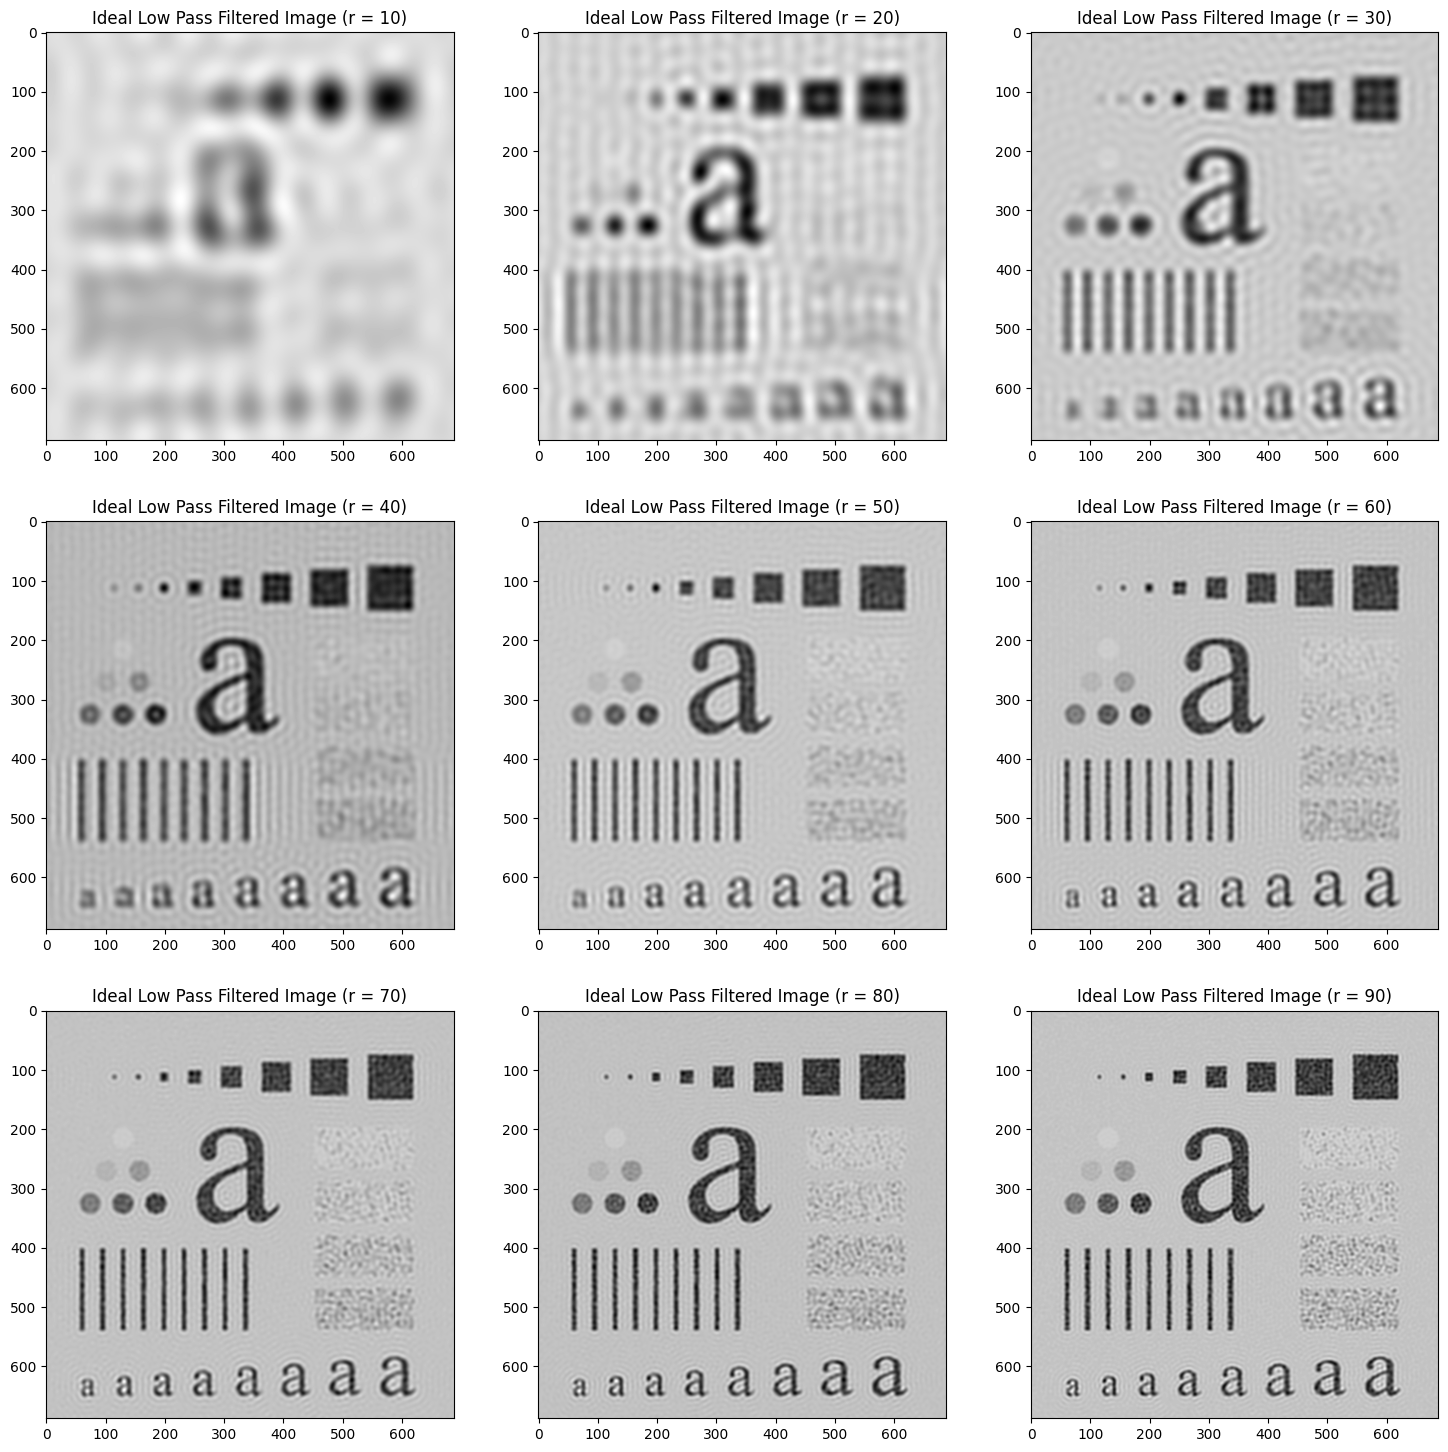

In [34]:
n = 9
row = int(np.ceil(n/3))
plt.figure(figsize=(18, row*6))

for i in range(1, n+1):
    idealFilteredImage = applyIdealLowPassFilter(fftImage, i*10)
    idealFilteredImage = np.fft.ifft2(np.fft.ifftshift(idealFilteredImage)).real
    plt.subplot(row, 3, i)
    plt.imshow(idealFilteredImage, cmap='gray')
    plt.title(f"Ideal Low Pass Filtered Image (r = {i*10})")


In [28]:
print(int(np.ceil(7/3)))

3
